In [ ]:
##### code to graph

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage
from matplotlib.dates import MonthLocator, DateFormatter
import matplotlib.dates as mdates
import matplotlib.font_manager as font_manager


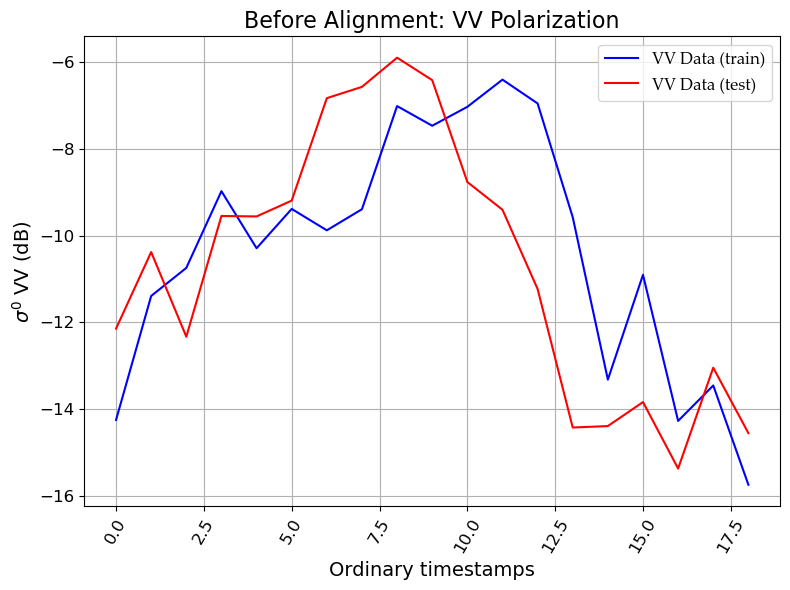

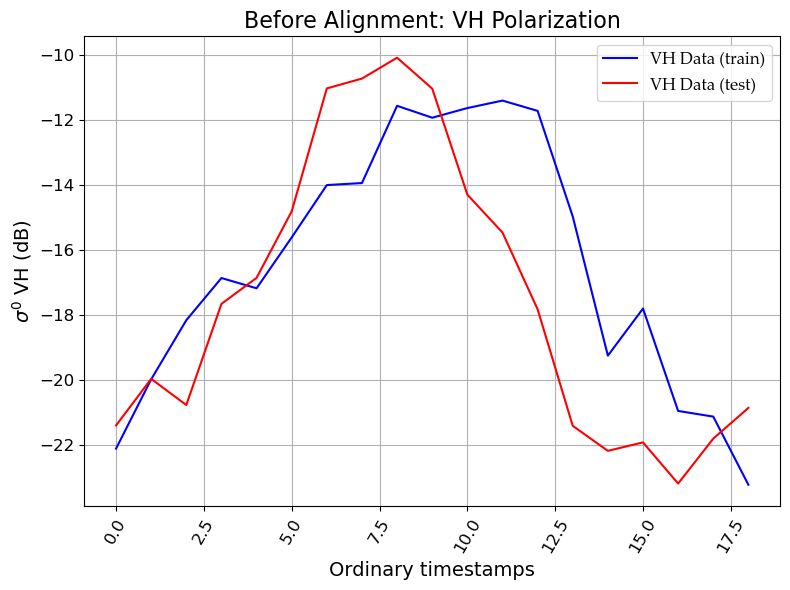

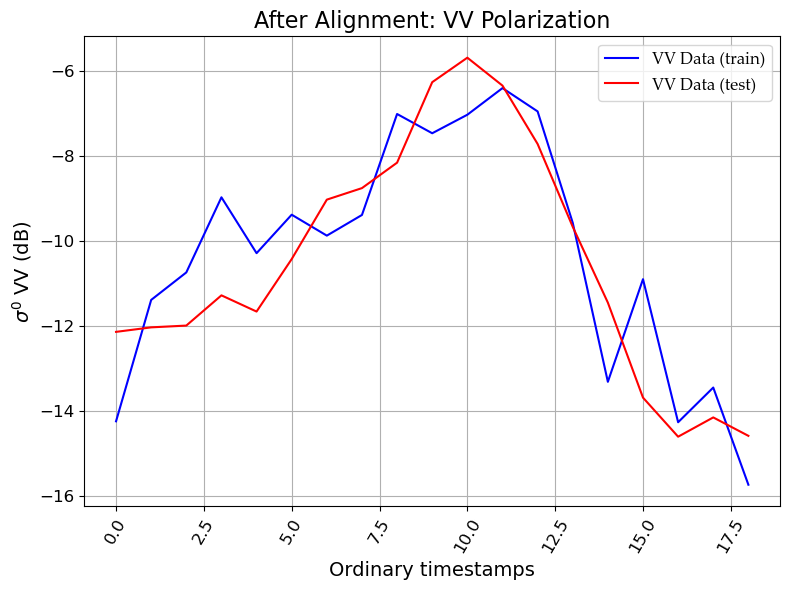

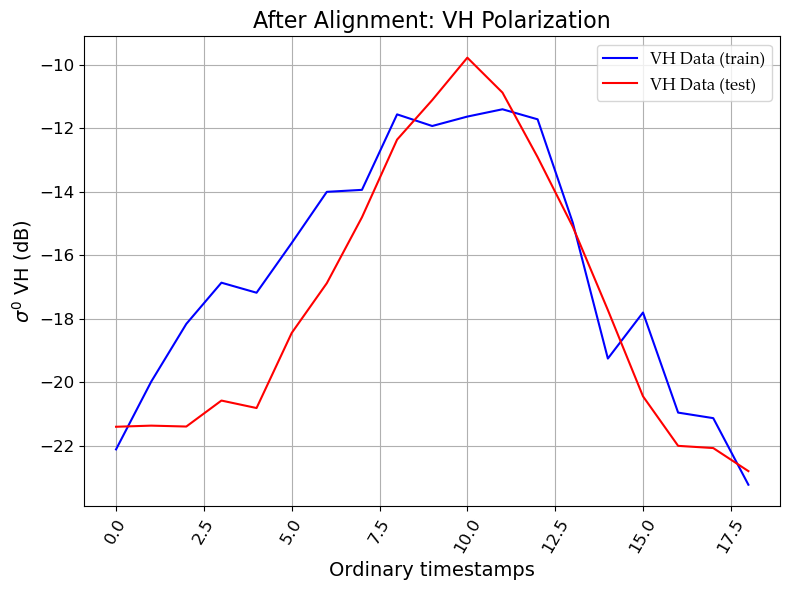

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager

# Utility function
def to_dB(x):
    """Convert input values to decibels."""
    return 10 * np.log10(x)

def load_and_process_data(file_path, target_class="CZH"):
    """Load SAR dataset and process target class."""
    dataset = np.load(file_path, allow_pickle=True)
    X_SAR, y_multi = dataset["X_SAR"], dataset["y"]
    colza_SAR = X_SAR[y_multi == target_class]
    colza_SAR = to_dB(colza_SAR)
    return colza_SAR, np.mean(colza_SAR, axis=0)

def plot_sar_data(mean_train, mean_test, polarization, title):
    """Plot SAR data for train and test datasets."""
    index = 0 if polarization == "VV" else 1  # Determine polarization index
    plt.figure(figsize=(8, 6))
    plt.plot(mean_train[:, index], color='blue', label=f'{polarization} Data (train)')
    plt.plot(mean_test[:, index], color='red', label=f'{polarization} Data (test)')
    plt.xlabel('Ordinary timestamps', fontsize=14)
    plt.ylabel(f'$\sigma^0$ {polarization} (dB)', fontsize=14)
    font = font_manager.FontProperties(family='Palatino Linotype', size=12)
    plt.legend(prop=font)
    plt.title(title, fontsize=16)
    plt.xticks(rotation=60, fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Paths to datasets
train_data_before = 'F:/back/back2411/Colza_DB2/phase2n/One_year/W5/CA_US/CA2019_US2020/Colza_data_C_W5_2019_matched.npz'
test_data_before = 'F:/back/back2411/Colza_DB2/phase2n/One_year/W5/CA_US/CA2019_US2020/Colza_data_U_new_5_2020_matched.npz'

### Only one dataset (train or test) needs to be changed because the alignment is applied to only one dataset (train or test).
train_data_after = 'F:/back/back2411/Colza_DB2/phase2n/One_year/W5/CA_US/CA2019_US2020/Colza_data_C_W5_2019_matched.npz'
test_data_after = 'F:/Colza_data_U_new_5_2020_aligned.npz'

# Processing data before alignment
colza_train_before, mean_train_before = load_and_process_data(train_data_before)
colza_test_before, mean_test_before = load_and_process_data(test_data_before)

# Plot before alignment for VV and VH
plot_sar_data(mean_train_before, mean_test_before, polarization="VV", title="Before Alignment: VV Polarization")
plot_sar_data(mean_train_before, mean_test_before, polarization="VH", title="Before Alignment: VH Polarization")

# Processing data after alignment
colza_train_after, mean_train_after = load_and_process_data(train_data_after)
colza_test_after, mean_test_after = load_and_process_data(test_data_after)

# Plot after alignment for VV and VH
plot_sar_data(mean_train_after, mean_test_after, polarization="VV", title="After Alignment: VV Polarization")
plot_sar_data(mean_train_after, mean_test_after, polarization="VH", title="After Alignment: VH Polarization")
